In [37]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [38]:
#load data
df = pd.read_csv("data/export.csv").rename(columns={'date':'year','Indonesia Count_Person':'population'})

#remove na values from data
df.dropna(inplace=True)
df.tail()

,year,population
56,2016,261556386
57,2017,264650969
58,2018,267670549
59,2019,270625567
60,2020,273523621


<Axes: xlabel='year'>

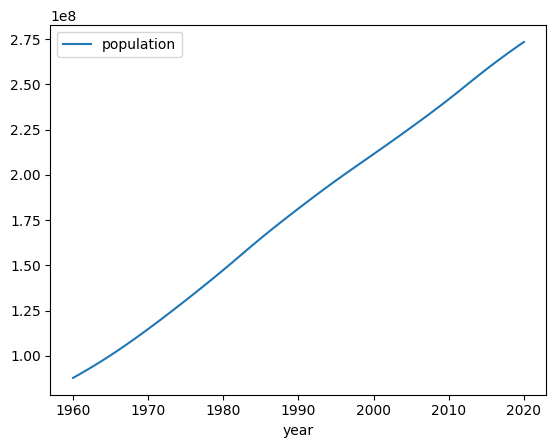

In [39]:
# plot data
df.plot(x='year')

The data obtained is very linear. For simple applications, it is felt that no further processing is needed

In [40]:
# set_feature and predict column
X = df[['year']]
y = df['population']

In [41]:
#build model with 20% data_test using linear regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


Accuracy = -1.5133536590851482e+16 %


c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


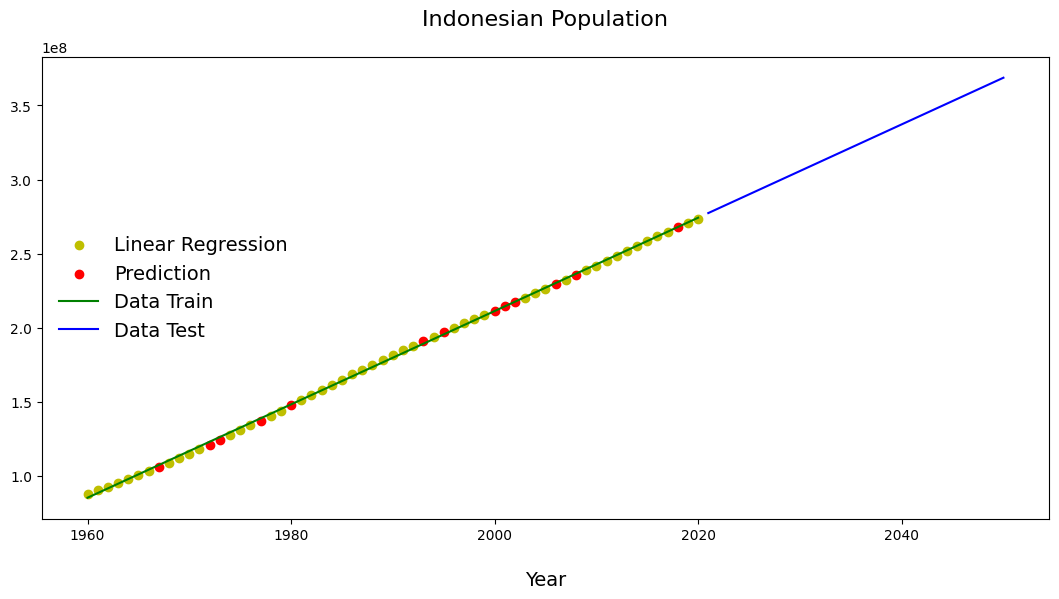

In [42]:
#score

r2=r2_score(X_test, y_test)*100
#r2='{:.2f}'.format(r2)
print('\nAccuracy = {} %'.format(r2))

#visualize
fig = plt.figure(figsize=(13,6))
plt.scatter(X_train, y_train,color='y')
plt.scatter(X_test, y_test,color='r')
plt.plot(np.linspace(1960,2020,90).reshape(-1,1), model.predict(np.linspace(1960,2020,90).reshape(-1,1)),'g')
plt.plot(np.linspace(2021,2050,30).reshape(-1,1), model.predict(np.linspace(2021,2050,30).reshape(-1,1)),'b')
plt.title('Indonesian Population\n',fontsize=16,loc="center")
plt.legend(['Linear Regression','Prediction','Data Train', 'Data Test'],fontsize=14,loc="center left",markerscale=1,frameon=False)
plt.xlabel('\nYear',fontsize=14)
plt.show()

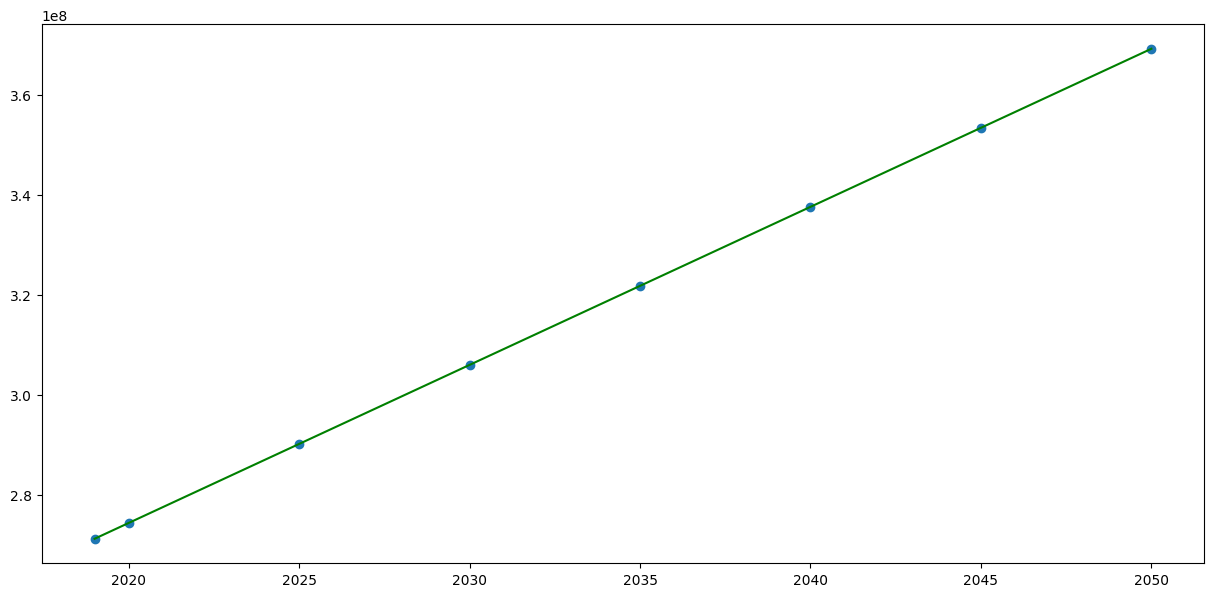

,year,prediction
0,2019,271144260
1,2020,274305656
2,2025,290112635
3,2030,305919615
4,2035,321726594
5,2040,337533574
6,2045,353340554
7,2050,369147533


In [20]:
yp=[2019,2020,2025,2030,2035,2040,2045,2050]
my=pd.DataFrame(yp).rename(columns={0:'year'})
my['prediction']=model.predict(my).astype(int)
fig = plt.figure(figsize=(15,7))
plt.scatter(my.year, my.prediction)
plt.plot(my.year, my.prediction,'g')
plt.show()
my

In [21]:
#predict by year
year=[2018,2020,2021,2022,2023,2024]
for i in year:
    print('Prediction for Indonesian Population in {} is {}'.format(i,model.predict([[i]]).astype(int)))

Prediction for Indonesian Population in 2018 is [267982864]
Prediction for Indonesian Population in 2020 is [274305656]
Prediction for Indonesian Population in 2021 is [277467052]
Prediction for Indonesian Population in 2022 is [280628448]
Prediction for Indonesian Population in 2023 is [283789844]
Prediction for Indonesian Population in 2024 is [286951239]


c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\multa\anaconda3\envs\

In [7]:
df.tail()

,year,population
56,2016,261556386
57,2017,264650969
58,2018,267670549
59,2019,270625567
60,2020,273523621


In [23]:
# saving the model 
import pickle 
pickle_out = open("model/indonesian_population_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [24]:
# loading the trained model
pickle_in = open('model/indonesian_population_model.pkl', 'rb') 
modeled = pickle.load(pickle_in)

In [25]:
def pred(year):
    prediction = int(modeled.predict([[year]]))
    return prediction

In [27]:
pred(2023)

c:\Users\multa\anaconda3\envs\github\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\multa\AppData\Local\Temp\ipykernel_10404\1587389293.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(modeled.predict([[year]]))


283789844